In [44]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [45]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [46]:
y.shape, tx.shape

((10000,), (10000, 2))

In [47]:
print(y)
print(tx)

[109.81967768  73.68895452  96.58434842 ...  58.32779473  74.38901745
  51.59669261]
[[ 1.          1.94406149]
 [ 1.          0.62753668]
 [ 1.          2.01244346]
 ...
 [ 1.         -0.64968792]
 [ 1.          0.69312469]
 [ 1.         -1.14970831]]


# 1 Computing the Cost Function

- Each column represent a features or indipendent variable, in this case 1 (inserted just for computational reason) and the height
- Each row is a data in the dataset
- We have 1s to use matrix calculation by including w0 in w vector
- [3x1], [3x2]; X_32 is the height of the third person

a) 
    L(w)=1/(2N)*eT*e

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [42]:
def compute_loss_MSE(y, tx, w):
    
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    #using mse
    e=y-tx.dot(w)
    N=len(y)
    L=e.T.dot(e)/(2*N)
    
    return L

In [100]:
print(compute_loss(y,tx,[1,2]))

2694.483365887084


# 2 Grid Search

Fill in the function `grid_search()` below:

In [17]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    for i0,w_0 in enumerate(w0):
        for i1,w_1 in enumerate(w1):
            losses[i0,i1]=compute_loss(y,tx,[w_0,w_1])
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=15.558703368609526, w0*=72.72727272727272, w1*=13.636363636363626, execution time=1.225 seconds


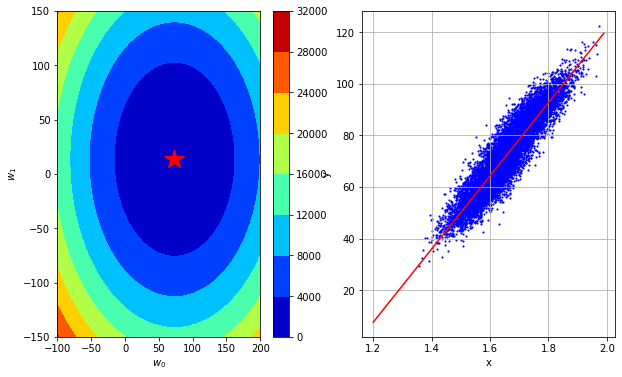

In [20]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

It doesn't look a good estimate because the linear regression doesn't fit well through the majority of the points.
The MSE is not smoot because we have step changing of the Loss value due to the point chosen

- With a fine grid we achive a better fit
- By increasing it we achive a better fit
- The code run slower

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [103]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    e=y-tx.dot(w)
    N=len(y)
    grad = -(np.transpose(tx).dot(e))/N
    return grad

In [104]:
X=np.array([[1, 2], [1, 4]])
print (compute_gradient([1,2],X,[1,2]))

[ 5.5 18. ]


In [105]:
w1=[100, 20]
w2=[50, 10]
g1=compute_gradient(y,tx,w1)
g2=compute_gradient(y,tx,w2)
print(g1)
print(g2)
print(np.linalg.norm(g1,2))
print(np.linalg.norm(g2,2))

[26.706078    6.52028757]
[-23.293922    -3.47971243]
27.49052112929247
23.552392678247763


The gradient value tell us that we have to move in opposite direction for the next step in the two different cases
The norm is bigger in the first case, it means we have more steps to do to converge to a good value in the gradient_descent, as we are far from the minimum

Please fill in the functions `gradient_descent` below:

In [106]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        g = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        w = w - gamma*g;
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): ||gradient||={grad}, loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, grad=np.linalg.norm(g), l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [114]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 200
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/199): ||gradient||=74.52316183429596, loss=2792.236712759167, w0=51.305745401473594, w1=9.435798704492274
Gradient Descent(1/199): ||gradient||=22.35694855028883, loss=265.30246210896087, w0=66.6974690219157, w1=12.266538315839998
Gradient Descent(2/199): ||gradient||=6.7070845650866815, loss=37.87837955044136, w0=71.31498610804834, w1=13.115760199244333
Gradient Descent(3/199): ||gradient||=2.0121253695259966, loss=17.41021212017447, w0=72.70024123388814, w1=13.370526764265632
Gradient Descent(4/199): ||gradient||=0.603637610857799, loss=15.568077051450452, w0=73.11581777164007, w1=13.446956733772023
Gradient Descent(5/199): ||gradient||=0.18109128325734888, loss=15.402284895265295, w0=73.24049073296565, w1=13.469885724623941
Gradient Descent(6/199): ||gradient||=0.05432738497720663, loss=15.38736360120863, w0=73.27789262136334, w1=13.476764421879516
Gradient Descent(7/199): ||gradient||=0.016298215493152555, loss=15.386020684743533, w0=73.28911318788263, w1=13.4788

Gradient Descent(179/199): ||gradient||=3.8234330360328636e-15, loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(180/199): ||gradient||=3.8234330360328636e-15, loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(181/199): ||gradient||=3.8234330360328636e-15, loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(182/199): ||gradient||=3.8234330360328636e-15, loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(183/199): ||gradient||=3.8234330360328636e-15, loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(184/199): ||gradient||=3.8234330360328636e-15, loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(185/199): ||gradient||=3.8234330360328636e-15, loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(186/199): ||gradient||=3.8234330360328636e-15, loss=15.38588786882

In [108]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=201, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

c)
- The cost is minimized just at the first 5 iterations, after that it remains constant
- The algorithm is converging toward the optimum as the norm of the gradient goes to zero and we are using a convex function. The function converge in a reasonable time (100 ms), but considering a tiny example like this one maybe is not so good
- The final values are pretty good as the loss is not so high and the regression seems good

In [109]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = [0.001,0.01,0.5,1,2,2.5]

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
for g in gamma:
    print("Gamma={}".format(g), end='\n')
    start_time = datetime.datetime.now()
    gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, g)
    end_time = datetime.datetime.now()
    
    # Print result
    exection_time = (end_time - start_time).total_seconds()
    print("Gradient Descent: execution time={t:.3f} seconds\n\n".format(t=exection_time))


Gamma=0.001
Gradient Descent(0/49): ||gradient||=74.52316183429596, loss=2792.236712759167, w0=0.07329392200210513, w1=0.013479712434988963
Gradient Descent(1/49): ||gradient||=74.44863867246171, loss=2786.685787960212, w0=0.1465145500822082, w1=0.026945945157542985
Gradient Descent(2/49): ||gradient||=74.37419003378926, loss=2781.1459594599287, w0=0.21966195753423118, w1=0.04039871164737446
Gradient Descent(3/49): ||gradient||=74.29981584375541, loss=2775.6172050768187, w0=0.2927362175788021, w1=0.053838025370716074
Gradient Descent(4/49): ||gradient||=74.2255160279117, loss=2770.0995026737196, w0=0.36573740336332844, w1=0.06726389978033431
Gradient Descent(5/49): ||gradient||=74.15129051188381, loss=2764.592830157724, w0=0.43866558796207034, w1=0.08067634831554296
Gradient Descent(6/49): ||gradient||=74.07713922137188, loss=2759.0971654800883, w0=0.5115208443762134, w1=0.0940753844022164
Gradient Descent(7/49): ||gradient||=74.00306208215046, loss=2753.612486636144, w0=0.584303245533

Gradient Descent(40/49): ||gradient||=6.778056133478317e-11, loss=15.385887868829398, w0=73.29392200207185, w1=13.47971243498292
Gradient Descent(41/49): ||gradient||=3.3896267686167926e-11, loss=15.385887868829398, w0=73.29392200208852, w1=13.479712434985984
Gradient Descent(42/49): ||gradient||=1.6946114015269505e-11, loss=15.385887868829403, w0=73.29392200209685, w1=13.479712434987517
Gradient Descent(43/49): ||gradient||=8.477166755510754e-12, loss=15.3858878688294, w0=73.29392200210101, w1=13.479712434988283
Gradient Descent(44/49): ||gradient||=4.243941966305814e-12, loss=15.385887868829398, w0=73.2939220021031, w1=13.479712434988667
Gradient Descent(45/49): ||gradient||=2.1216387096435954e-12, loss=15.385887868829403, w0=73.29392200210414, w1=13.479712434988858
Gradient Descent(46/49): ||gradient||=1.0640642545780883e-12, loss=15.385887868829403, w0=73.29392200210467, w1=13.479712434988954
Gradient Descent(47/49): ||gradient||=5.342444959345109e-13, loss=15.3858878688294, w0=73.

Gradient Descent(36/49): ||gradient||=74.5231618342957, loss=2792.236712759146, w0=146.58784400421013, w1=26.9594248699773
Gradient Descent(37/49): ||gradient||=74.5231618342957, loss=2792.236712759138, w0=1.7053025658242404e-13, w1=6.430411758628907e-13
Gradient Descent(38/49): ||gradient||=74.5231618342957, loss=2792.236712759146, w0=146.58784400421013, w1=26.9594248699773
Gradient Descent(39/49): ||gradient||=74.5231618342957, loss=2792.236712759138, w0=1.7053025658242404e-13, w1=6.430411758628907e-13
Gradient Descent(40/49): ||gradient||=74.5231618342957, loss=2792.236712759146, w0=146.58784400421013, w1=26.9594248699773
Gradient Descent(41/49): ||gradient||=74.5231618342957, loss=2792.236712759138, w0=1.7053025658242404e-13, w1=6.430411758628907e-13
Gradient Descent(42/49): ||gradient||=74.5231618342957, loss=2792.236712759146, w0=146.58784400421013, w1=26.9594248699773
Gradient Descent(43/49): ||gradient||=74.5231618342957, loss=2792.236712759138, w0=1.7053025658242404e-13, w1=6.

d1) 
- 0.001 -> Do not converge also with many iterations, but loss gradually decreases, so with a lot of iteration will converge
- 0.01 -> Better execution time, but don't converge too (as before, yes with a lot of iterations)
- 0.5 -> Converge in 15 steps
- 1 -> Converge in 1 step
- 2 -> Don't converge or diverge, same loss for ever
- 2.5 -> Diverge

In [110]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([[0, 0],[100,10],[-1000,1000]])

# Start gradient descent.
for w in w_initial:
    print("w={}".format(w), end='\n')
    start_time = datetime.datetime.now()
    gradient_losses, gradient_ws = gradient_descent(y, tx, w, max_iters, gamma)
    end_time = datetime.datetime.now()
    
    # Print result
    exection_time = (end_time - start_time).total_seconds()
    print("Gradient Descent: execution time={t:.3f} seconds\n\n".format(t=exection_time))


w=[0 0]
Gradient Descent(0/49): ||gradient||=74.52316183429596, loss=2792.236712759167, w0=7.329392200210513, w1=1.3479712434988964
Gradient Descent(1/49): ||gradient||=67.07084565086643, loss=2264.6350560300034, w0=13.925845180399982, w1=2.561145362647901
Gradient Descent(2/49): ||gradient||=60.36376108577983, loss=1837.27771407938, w0=19.862652862570506, w1=3.653002069882011
Gradient Descent(3/49): ||gradient||=54.327384977201824, loss=1491.1182670993755, w0=25.20577977652398, w1=4.635673106392703
Gradient Descent(4/49): ||gradient||=48.89464647948164, loss=1210.729115045572, w0=30.014593999082102, w1=5.520077039252332
Gradient Descent(5/49): ||gradient||=44.005181831533335, loss=983.6139018819906, w0=34.3425267993844, w1=6.316040578825997
Gradient Descent(6/49): ||gradient||=39.60466364838006, loss=799.6505792194905, w0=38.237666319656476, w1=7.032407764442295
Gradient Descent(7/49): ||gradient||=35.6441972835421, loss=650.6402878628649, w0=41.74329188790134, w1=7.677138231496968
Gr

Gradient Descent(8/49): ||gradient||=627.5352878364489, loss=196915.65462785607, w0=-342.5221341006778, w1=395.67788465184566
Gradient Descent(9/49): ||gradient||=564.7817590528042, loss=159504.6035672584, w0=-300.9405284903995, w1=357.45806743015993
Gradient Descent(10/49): ||gradient||=508.3035831475234, loss=129201.65220817438, w0=-263.517083441149, w1=323.06023193064283
Gradient Descent(11/49): ||gradient||=457.4732248327715, loss=104656.2616073163, w0=-229.8359828968235, w1=292.10217998107737
Gradient Descent(12/49): ||gradient||=411.72590234949405, loss=84774.49522062122, w0=-199.52299240693057, w1=264.2399332264685
Gradient Descent(13/49): ||gradient||=370.5533121145444, loss=68670.26444739825, w0=-172.24130096602698, w1=239.1639111473205
Gradient Descent(14/49): ||gradient||=333.49798090309014, loss=55625.83752108763, w0=-147.68777866921374, w1=216.59549127608727
Gradient Descent(15/49): ||gradient||=300.14818281278076, loss=45059.85171077605, w0=-125.58960860208184, w1=196.283

d2)
- With [0, 0] converge in 40 steps
- With [100, 0] converge in 30 steps
- With [-1000,1000] does not converge (the gradient has an high norm for the beginning, we need many steps)

Note: with gamma = 1 in 1 step we converge, with 0.8 also the last one converge in few steps.

# 4 Stochastic gradient descent

In [111]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    e=y-tx.dot(w)
    N=len(y)
    grad = -(np.transpose(tx).dot(e))/N
    return grad


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        for yn, xn in batch_iter(y, tx, batch_size):
            g = compute_stoch_gradient(yn, xn, w)
        w = w - gamma*g;
        loss = compute_loss(y, tx, w)
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("SGD({bi}/{ti}): |gradient|={grad}, loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, grad=np.linalg.norm(g), l=loss, w0=w[0], w1=w[1]))

    return losses, ws
    return losses, ws

In [115]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 200
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD(0/199): |gradient|=133.93229103776855, loss=1800.4781408406268, w0=60.287641628256395, w1=71.79798724469538
SGD(1/199): |gradient|=8.357842148964188, loss=1818.1202809852641, w0=65.99591442456814, w1=73.08011404127926
SGD(2/199): |gradient|=6.603416380249035, loss=1765.636127925073, w0=61.65605336304664, w1=71.4888539012485
SGD(3/199): |gradient|=57.50637169372231, loss=1295.3122208623186, w0=32.63557165537449, w1=43.592022427241034
SGD(4/199): |gradient|=51.32242270446967, loss=539.054255781727, w0=68.51125838201902, w1=45.48694387606965
SGD(5/199): |gradient|=12.436255725902509, loss=579.394036831112, w0=77.10954602630264, w1=46.84822021149192
SGD(6/199): |gradient|=158.9952003549692, loss=3252.546278846704, w0=28.01792514592374, w1=-53.036487776950324
SGD(7/199): |gradient|=3.197503499840815, loss=3244.6980452484963, w0=29.937554652730658, w1=-54.187485859498
SGD(8/199): |gradient|=208.34560626119458, loss=2195.262213371256, w0=118.03107916586703, w1=62.04244938328851
SGD(9/199)

SGD(97/199): |gradient|=22.6100973238277, loss=70.94431901421565, w0=68.72082163361478, w1=22.977270821779058
SGD(98/199): |gradient|=6.897523618466342, loss=50.307298228663704, w0=73.41228536344907, w1=21.836075928420865
SGD(99/199): |gradient|=1.877578400908467, loss=44.37805590062196, w0=72.36805883403547, w1=21.03796047653922
SGD(100/199): |gradient|=15.619301232059808, loss=45.84987828038964, w0=65.55133024000627, w1=12.489634847828123
SGD(101/199): |gradient|=12.561309662981195, loss=30.998295567038465, w0=73.049620846535, w1=7.8971384460655525
SGD(102/199): |gradient|=1.3351031240902613, loss=28.197969066914784, w0=73.8076253442112, w1=8.443814176239188
SGD(103/199): |gradient|=7.728268246789125, loss=35.36976690831118, w0=68.4797955150482, w1=9.381914947852831
SGD(104/199): |gradient|=14.893756011617375, loss=26.075872653638253, w0=77.90361692628608, w1=13.841212470395241
SGD(105/199): |gradient|=4.936227841011481, loss=17.167087001689286, w0=74.7941229028144, w1=12.33437601138

In [116]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=201, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

In [117]:
height, weight, gender = load_data(sub_sample=True, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

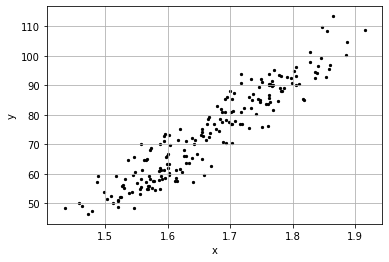

In [118]:
fig = plt.figure();
ax = fig.add_subplot(1,1,1)
ax.scatter(height, weight, marker=".", color='black', s=20)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid()

In [119]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): ||gradient||=75.04170559931181, loss=2829.2722244384167, w0=51.54259072181176, w1=10.132993413506084
Gradient Descent(1/49): ||gradient||=22.512511679793548, loss=267.0500258779429, w0=67.0053679383553, w1=13.172891437557825
Gradient Descent(2/49): ||gradient||=6.753753503938062, loss=36.45002800750046, w0=71.64420110331838, w1=14.084860844773324
Gradient Descent(3/49): ||gradient||=2.026126051181407, loss=15.696028199160635, w0=73.03585105280729, w1=14.358451666937965
Gradient Descent(4/49): ||gradient||=0.6078378153544277, loss=13.82816821641008, w0=73.45334603765397, w1=14.440528913587356
Gradient Descent(5/49): ||gradient||=0.1823513446063224, loss=13.660060817962524, w0=73.57859453310797, w1=14.46515208758217
Gradient Descent(6/49): ||gradient||=0.054705403381892795, loss=13.644931152102242, w0=73.61616908174418, w1=14.472539039780616
Gradient Descent(7/49): ||gradient||=0.016411621014564687, loss=13.643569482174819, w0=73.62744144633503, w1=14.474755125440

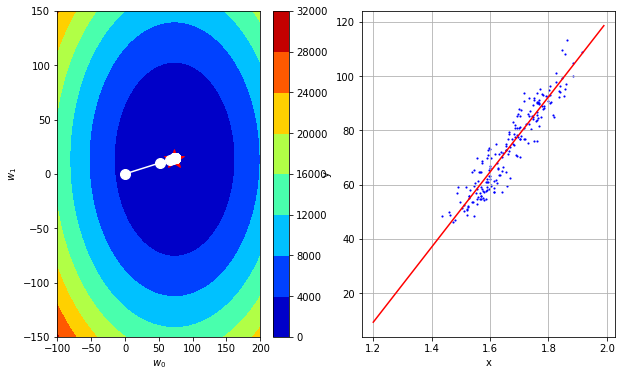

In [120]:
fig = gradient_descent_visualization(
    gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)

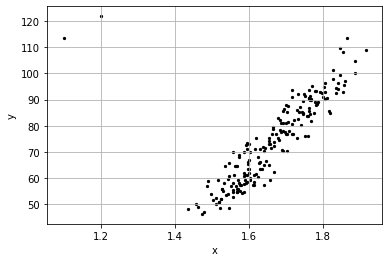

In [121]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

fig = plt.figure();
ax = fig.add_subplot(1,1,1)
ax.scatter(height, weight, marker=".", color='black', s=20)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid()

In [122]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): ||gradient||=74.88530409143367, loss=2869.835114535854, w0=51.84746409844842, w1=7.724426406192425
Gradient Descent(1/49): ||gradient||=22.465591227430128, loss=318.28212470159644, w0=67.40170332798297, w1=10.041754328050116
Gradient Descent(2/49): ||gradient||=6.739677368229053, loss=88.6423556165128, w0=72.06797509684336, w1=10.736952704607413
Gradient Descent(3/49): ||gradient||=2.0219032104687074, loss=67.9747763988552, w0=73.46785662750146, w1=10.9455122175746
Gradient Descent(4/49): ||gradient||=0.6065709631406114, loss=66.11469426926604, w0=73.88782108669889, w1=11.00808007146475
Gradient Descent(5/49): ||gradient||=0.1819712889421865, loss=65.94728687760302, w0=74.01381042445813, w1=11.026850427631798
Gradient Descent(6/49): ||gradient||=0.05459138668265034, loss=65.93222021235334, w0=74.0516072257859, w1=11.032481534481912
Gradient Descent(7/49): ||gradient||=0.016377416004788984, loss=65.93086421248087, w0=74.06294626618423, w1=11.034170866536945
Gradi

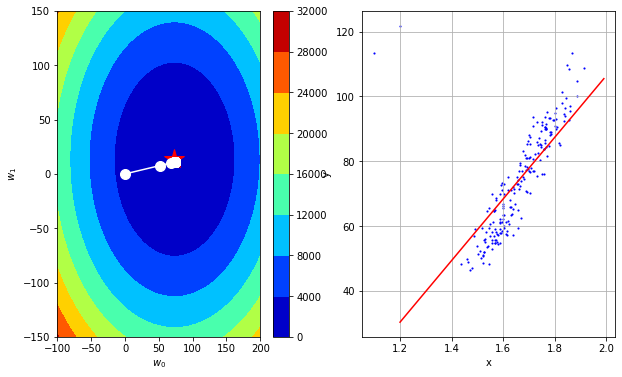

In [123]:
fig = gradient_descent_visualization(
    gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)

The fit is not good at all, the outliers lead the loss to be too high everytime

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [11]:
def compute_loss_MAE(y, tx, w):
    
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    #using mae
    e=y-tx.dot(w)
    N=len(y)
    L=np.abs(np.sum(e))/N
    
    return L

In [125]:
print (compute_loss_MAE(np.array([1,2]).T,np.array([[1,2],[1,4]]),[2,1])) #ok, work

3.5


In [151]:
import random
def compute_gradient_MAE(y, tx, w): 
    N=len(y)
    D=tx.shape[1]
    grad=np.zeros(D)
    
    for (xn,yn) in zip(tx,y):
        en = yn-xn.T.dot(w)
        if (en==0):
            grad=grad+random.uniform(-1,1)*xn.T
        if (en>0):
            grad-=xn.T
        else:
            grad+=xn.T
    grad/=N
    return grad

In [32]:
import random
def compute_gradient_MAE_2(y, tx, w):
    e = y-tx.dot(w)
    N=len(y)
    e[e>0] = 1
    e[e<0] = -1
    e[e==0] = random.uniform(-1,1)
    return -tx.T.dot(e)/N

In [36]:
def compute_gradient_MAE_3(y, tx, w):
    e = y-tx.dot(w)
    N=len(y)
    return -tx.T.dot(np.sign(e))/N

In [37]:
def gradient_descent_MAE(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        g = compute_gradient_MAE_3(y, tx, w)
        loss = compute_loss_MAE(y, tx, w)
        w = w - gamma*g;
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): ||gradient||={grad}, loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, grad=np.linalg.norm(g), l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [38]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 150
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent_MAE(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/149): ||gradient||=1.0, loss=73.29392200210518, w0=0.7, w1=-8.276401786133646e-16
Gradient Descent(1/149): ||gradient||=1.0, loss=72.59392200210517, w0=1.4, w1=-1.6552803572267292e-15
Gradient Descent(2/149): ||gradient||=1.0, loss=71.89392200210517, w0=2.0999999999999996, w1=-2.482920535840094e-15
Gradient Descent(3/149): ||gradient||=1.0, loss=71.19392200210518, w0=2.8, w1=-3.3105607144534584e-15
Gradient Descent(4/149): ||gradient||=1.0, loss=70.49392200210517, w0=3.5, w1=-4.138200893066823e-15
Gradient Descent(5/149): ||gradient||=1.0, loss=69.79392200210518, w0=4.2, w1=-4.965841071680188e-15
Gradient Descent(6/149): ||gradient||=1.0, loss=69.09392200210519, w0=4.9, w1=-5.793481250293553e-15
Gradient Descent(7/149): ||gradient||=1.0, loss=68.39392200210519, w0=5.6000000000000005, w1=-6.6211214289069176e-15
Gradient Descent(8/149): ||gradient||=1.0, loss=67.69392200210518, w0=6.300000000000001, w1=-7.448761607520282e-15
Gradient Descent(9/149): ||gradient||=1.0, l

In [35]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=151, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

b)
- The fitting is almost the same, the loss function is lower.
- My algorithm never encountered a non-differentiable point

In [53]:
def compute_stoch_gradient_MAE(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    e = y-tx.dot(w)
    N=len(y)
    D=tx.shape[1]
    grad=np.zeros(D)
    
    for (xn,yn) in zip(tx,y):
        en = yn-xn.T.dot(w)
        if (en==0):
            grad=grad+random.uniform(-1,1)*xn.T
        if (en>0):
            grad-=xn.T
        else:
            grad+=xn.T
    grad/=N
    return grad

def compute_stoch_gradient_MAE_3(y, tx, w):
    e = y-tx.dot(w)
    N=len(y)
    return -tx.T.dot(np.sign(e))/N

def stochastic_gradient_descent_MAE(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        for yn, xn in batch_iter(y, tx, batch_size):
            g = compute_stoch_gradient_MAE_3(yn, xn, w)
            w = w - gamma*g;
            loss = compute_loss_MAE(y, tx, w)
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("SGD({bi}/{ti}): |gradient|={grad}, loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, grad=np.linalg.norm(g), l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [54]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent_MAE(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD(0/499): |gradient|=1.5033420664588226, loss=72.59392200210517, w0=0.7, w1=0.785759702901908
SGD(1/499): |gradient|=1.0458257069919772, loss=71.89392200210519, w0=1.4, w1=1.0000916664737975
SGD(2/499): |gradient|=1.0020567620888254, loss=71.19392200210517, w0=2.0999999999999996, w1=1.0450104785628425
SGD(3/499): |gradient|=1.0852418946438054, loss=70.49392200210517, w0=2.8, w1=1.3401333093403638
SGD(4/499): |gradient|=1.0550200709639794, loss=69.79392200210518, w0=3.5, w1=1.1047548872897186
SGD(5/499): |gradient|=1.2497748909436892, loss=69.09392200210517, w0=4.2, w1=1.629492217995589
SGD(6/499): |gradient|=1.5080926312586056, loss=68.39392200210516, w0=4.9, w1=0.8392844868364419
SGD(7/499): |gradient|=1.607359124636145, loss=67.69392200210518, w0=5.6000000000000005, w1=-0.04160463457443475
SGD(8/499): |gradient|=2.1331006801422103, loss=66.99392200210517, w0=6.300000000000001, w1=-1.3605277068934192
SGD(9/499): |gradient|=1.8306647572060948, loss=66.29392200210518, w0=7.00000000000

SGD(111/499): |gradient|=1.2391531845415107, loss=1.8939220021050496, w0=71.40000000000013, w1=8.047624860017713
SGD(112/499): |gradient|=1.2940283637045842, loss=1.1939220021050472, w0=72.10000000000014, w1=8.622524511239787
SGD(113/499): |gradient|=1.3931256899539464, loss=1.8939220021050507, w0=71.40000000000013, w1=9.301488134804947
SGD(114/499): |gradient|=1.044480772184795, loss=1.193922002105048, w0=72.10000000000014, w1=9.09039421992999
SGD(115/499): |gradient|=1.1286264627826885, loss=1.8939220021050511, w0=71.40000000000013, w1=9.456673989125271
SGD(116/499): |gradient|=1.2459599991723693, loss=1.1939220021050492, w0=72.10000000000014, w1=9.976946991090037
SGD(117/499): |gradient|=1.2359236117023942, loss=1.893922002105053, w0=71.40000000000013, w1=10.48535481483207
SGD(118/499): |gradient|=1.1154638656159648, loss=1.19392200210505, w0=72.10000000000014, w1=10.831313224749369
SGD(119/499): |gradient|=1.237543427558905, loss=1.8939220021050533, w0=71.40000000000013, w1=11.3416

SGD(214/499): |gradient|=1.583836573325003, loss=3.0060779978949648, w0=76.30000000000015, w1=13.050938268241271
SGD(215/499): |gradient|=1.4343117630309568, loss=2.306077997894963, w0=75.60000000000015, w1=12.331179548635323
SGD(216/499): |gradient|=1.9512607364188936, loss=1.6060779978949613, w0=74.90000000000015, w1=11.158304855358116
SGD(217/499): |gradient|=1.1744895459995337, loss=0.9060779978949577, w0=74.20000000000014, w1=11.589487635504163
SGD(218/499): |gradient|=1.8272415502500123, loss=0.20607799789495365, w0=73.50000000000014, w1=12.660009809328898
SGD(219/499): |gradient|=1.1034053592544268, loss=0.4939220021050495, w0=72.80000000000014, w1=12.986470617922183
SGD(220/499): |gradient|=1.4628237269290743, loss=0.20607799789495243, w0=73.50000000000014, w1=13.733817990616211
SGD(221/499): |gradient|=1.32124318200155, loss=0.4939220021050497, w0=72.80000000000014, w1=13.129347199317793
SGD(222/499): |gradient|=1.2348073957722854, loss=0.20607799789495376, w0=73.5000000000001

SGD(288/499): |gradient|=1.1513073417628237, loss=0.20607799789495485, w0=73.50000000000014, w1=11.429032083018829
SGD(289/499): |gradient|=1.292720339268607, loss=0.4939220021050487, w0=72.80000000000014, w1=12.00248799154518
SGD(290/499): |gradient|=1.4372086132958208, loss=1.1939220021050525, w0=72.10000000000014, w1=12.725072666918614
SGD(291/499): |gradient|=1.3655907843259476, loss=1.8939220021050558, w0=71.40000000000013, w1=13.376049404763846
SGD(292/499): |gradient|=1.5861825045205717, loss=1.1939220021050538, w0=72.10000000000014, w1=14.237923942876618
SGD(293/499): |gradient|=2.090774015388661, loss=1.8939220021050551, w0=71.40000000000013, w1=12.952640070777552
SGD(294/499): |gradient|=1.000008667385983, loss=1.1939220021050525, w0=72.10000000000014, w1=12.949725611123707
SGD(295/499): |gradient|=1.4170680701129745, loss=0.49392200210505055, w0=72.80000000000014, w1=13.652548589201059
SGD(296/499): |gradient|=1.332245188727579, loss=1.193922002105054, w0=72.10000000000014, 

SGD(391/499): |gradient|=1.2182940297112703, loss=0.493922002105053, w0=72.80000000000014, w1=15.831816192309702
SGD(392/499): |gradient|=1.0233662036995972, loss=0.20607799789494985, w0=73.50000000000014, w1=15.98402134849213
SGD(393/499): |gradient|=1.0528920277481821, loss=0.9060779978949524, w0=74.20000000000014, w1=16.214683427791876
SGD(394/499): |gradient|=1.284810657725667, loss=1.6060779978949558, w0=74.90000000000015, w1=15.650004909659057
SGD(395/499): |gradient|=1.0430247025942272, loss=0.9060779978949528, w0=74.20000000000014, w1=15.857541074721125
SGD(396/499): |gradient|=1.068363702805839, loss=1.6060779978949553, w0=74.90000000000015, w1=16.120764346340053
SGD(397/499): |gradient|=1.9212092457103098, loss=0.9060779978949537, w0=74.20000000000014, w1=14.972456010899018
SGD(398/499): |gradient|=1.0166355742267628, loss=0.2060779978949508, w0=73.50000000000014, w1=15.100668594071871
SGD(399/499): |gradient|=1.3379041019600315, loss=0.9060779978949544, w0=74.20000000000014,

SGD(484/499): |gradient|=1.565553984565068, loss=1.6060779978949546, w0=74.90000000000015, w1=16.636739032211175
SGD(485/499): |gradient|=2.1222446392105665, loss=0.9060779978949532, w0=74.20000000000014, w1=15.32642535555111
SGD(486/499): |gradient|=1.054681402303207, loss=0.20607799789495035, w0=73.50000000000014, w1=15.561058902978768
SGD(487/499): |gradient|=1.1025116896036868, loss=0.9060779978949528, w0=74.20000000000014, w1=15.886036890847578
SGD(488/499): |gradient|=1.2787760420278698, loss=1.6060779978949546, w0=74.90000000000015, w1=16.44396287265483
SGD(489/499): |gradient|=1.6898169838977548, loss=0.9060779978949532, w0=74.20000000000014, w1=15.490450468360077
SGD(490/499): |gradient|=1.7394428222601166, loss=0.2060779978949515, w0=73.50000000000014, w1=14.494170360841615
SGD(491/499): |gradient|=1.4098656693665044, loss=0.9060779978949551, w0=74.20000000000014, w1=13.79848121274992
SGD(492/499): |gradient|=1.0357692190215453, loss=0.20607799789495257, w0=73.50000000000014,

In [55]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=151, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

While in the MSE case the two pictures are very different (SGD move around all the contour while GD is monotonic),
in the MAE case the SGD and the GD are very similar.